This Jupyter notebook was adapted from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix


# Install

In [4]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2337, done.
remote: Total 2337 (delta 0), reused 0 (delta 0), pack-reused 2337
Receiving objects: 100% (2337/2337), 8.09 MiB | 4.63 MiB/s, done.
Resolving deltas: 100% (1499/1499), done.


In [5]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [8]:
!pip install -r requirements.txt

     |████████████████████████████████| 686kB 6.5MB/s 
     |████████████████████████████████| 204kB 17.6MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-cp36-none-any.whl size=655251 sha256=60915dbf43a3d5247157989d1ba97d6e74486e5b8d8fd273660eaf6f825e1e29
  Stored in directory: /root/.cache/pip/wheels/70/19/a7/6d589ed967f4dfefd33bc166d081257bd4ed0cb618dccfd62a
  Created wheel for torchfile: filename=torchfile-0.1.0-cp36-none-any.whl size=5711 sha256=30332524dac5a7da6480486e67eb278156e20f2373bca427f949d8d5444f370f
  Stored in directory: /root/.cache/pip/wheels/b1/c3/d6/9a1cc8f3a99a0fc1124cae20153f36af59a6e683daca0a0814
Successfully built visdom torchfile


# Dataset

Download the day2night dataset to test it.



In [10]:
!bash ./datasets/download_pix2pix_dataset.sh night2day

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
night2day/train/90_7568_to_7558.jpg
night2day/train/90_7568_to_7560.jpg
night2day/train/90_7568_to_7561.jpg
night2day/train/90_7568_to_7562.jpg
night2day/train/90_7568_to_7564.jpg
night2day/train/90_7568_to_7566.jpg
night2day/train/90_7618_to_7603.jpg
night2day/train/90_7618_to_7604.jpg
night2day/train/90_7618_to_7605.jpg
night2day/train/90_7618_to_7606.jpg
night2day/train/90_7618_to_7607.jpg
night2day/train/90_7618_to_7609.jpg
night2day/train/90_7618_to_7611.jpg
night2day/train/90_7618_to_7612.jpg
night2day/train/90_7618_to_7613.jpg
night2day/train/90_7618_to_7614.jpg
night2day/train/90_7618_to_7617.jpg
night2day/train/90_7618_to_7619.jpg
night2day/train/90_7618_to_7620.jpg
night2day/train/90_7618_to_7621.jpg
night2day/train/90_7618_to_7622.jpg
night2day/train/90_7618_to_7624.jpg
night2day/train/90_7623_to_7546.jpg
night2day/train/90_7623_to_7547.jpg
night2day/train/90_7623_to_7548.jpg
night2day/train/90_7623_to_7549.j

# Pretrained Model
Download the official pretrained model for day2night:

In [6]:
!bash ./scripts/download_pix2pix_model.sh day2night

Note: available models are edges2shoes, sat2map, map2sat, facades_label2photo, and day2night
Specified [day2night]
for details.

--2020-11-25 08:18:58--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/day2night.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.189.73
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.189.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217710797 (208M)
Saving to: ‘./checkpoints/day2night_pretrained/latest_net_G.pth’

./checkpoints/day2n 100%[===================>] 207.62M  21.6MB/s    in 11s     

2020-11-25 08:19:09 (19.5 MB/s) - ‘./checkpoints/day2night_pretrained/latest_net_G.pth’ saved [217710797/217710797]



# Testing

On test dataset:

In [31]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [35]:
cd datasets/christmas

/content/pytorch-CycleGAN-and-pix2pix/datasets/christmas


In [38]:
ls -la /content/gdrive/MyDrive

total 238501
-rw------- 1 root root     94614 Jul  9  2017  1_Mahnung.pdf
-rw------- 1 root root  18594770 Dec 26  2014 'aswitch dbtw.wmv'
-rw------- 1 root root       151 Jun 13  2018  BikCo.gslides
-rw------- 1 root root       151 May 26  2018 'ChangeLog eMMC card for BikCo.gdoc'
-rw------- 1 root root  33826718 Nov 25 09:18  ChristmasDecorator_good_lights.zip
drwx------ 2 root root      4096 Nov 18 18:25 'Colab Notebooks'/
-rw------- 1 root root  26154612 Dec 26  2014 'dbtw gainer dbtw.wmv'
-rw------- 1 root root     80985 Feb 16  2015 'Der Steppenwolf.docx'
-rw------- 1 root root       151 Jun 13  2018  Draft_Report_BikCo_MMM.gdoc
-rw------- 1 root root     83072 Aug 11  2019 'Einsatzabschlussbrief ZDP.pdf'
-rw------- 1 root root       151 Apr  1  2019  Essensgeld.gform
-rw------- 1 root root     50628 Nov 13  2014 'Forschungsethik (1).pptx'
-rw------- 1 root root     50463 Nov 13  2014  Forschungsethik.pptx
-rw------- 1 root root       151 Nov 14  2014  Forschungsethik.pptx.gslide

In [ ]:
!unzip /content/gdrive/MyDrive/ChristmasDecorator_good_lights.zip


In [54]:
mkdir ./datasets/christmas/ChristmasDecorator_good_lights/A

In [60]:
mkdir ./datasets/christmas/ChristmasDecorator_good_lights/test

In [61]:
cp ./datasets/christmas/ChristmasDecorator_good_lights/*.png datasets/christmas/ChristmasDecorator_good_lights/test


In [58]:
cp ./datasets/christmas/ChristmasDecorator_good_lights/*.png datasets/christmas/ChristmasDecorator_good_lights/B

In [46]:
cd /content/pytorch-CycleGAN-and-pix2pix/

/content/pytorch-CycleGAN-and-pix2pix


In [93]:
!python test.py --dataroot ./datasets/christmas/ChristmasDecorator_good_lights --direction AtoB --model pix2pix --name day2night_pretrained

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./datasets/christmas/ChristmasDecorator_good_lights	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0       

In [68]:
ls ./results/day2night_pretrained/test_latest/images/


14_1137_to_1114_fake_B.png  14_1137_to_1192_real_B.png
14_1137_to_1114_real_A.png  14_1140_to_1114_fake_B.png
14_1137_to_1114_real_B.png  14_1140_to_1114_real_A.png
14_1137_to_1115_fake_B.png  14_1140_to_1114_real_B.png
14_1137_to_1115_real_A.png  14_1140_to_1115_fake_B.png
14_1137_to_1115_real_B.png  14_1140_to_1115_real_A.png
14_1137_to_1117_fake_B.png  14_1140_to_1115_real_B.png
14_1137_to_1117_real_A.png  14_1140_to_1117_fake_B.png
14_1137_to_1117_real_B.png  14_1140_to_1117_real_A.png
14_1137_to_1120_fake_B.png  14_1140_to_1117_real_B.png
14_1137_to_1120_real_A.png  14_1140_to_1120_fake_B.png
14_1137_to_1120_real_B.png  14_1140_to_1120_real_A.png
14_1137_to_1124_fake_B.png  14_1140_to_1120_real_B.png
14_1137_to_1124_real_A.png  14_1140_to_1124_fake_B.png
14_1137_to_1124_real_B.png  14_1140_to_1124_real_A.png
14_1137_to_1126_fake_B.png  14_1140_to_1124_real_B.png
14_1137_to_1126_real_A.png  14_1140_to_1126_fake_B.png
14_1137_to_1126_real_B.png  14_1140_to_1126_real_A.png
14_1137_to

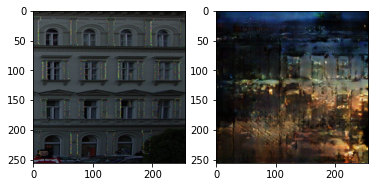

In [94]:
img_real = plt.imread('./results/day2night_pretrained/test_latest/images/dec2020-11-18-18-59-451_real_B.png')
img_fake = plt.imread('./results/day2night_pretrained/test_latest/images/dec2020-11-18-18-59-476_fake_B.png')

# display images
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_real);
ax[1].imshow(img_fake);

In [ ]:
from google.colab import files
files.download('./results/day2night_pretrained/test_latest/images/dec2020') 